In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

from sklearn.datasets import load_diabetes
data = load_diabetes()
data.feature_names

df = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [6]:
split_at=360
x_train=df[:split_at]
y_train=y[:split_at]
x_valid=df[split_at:]
y_valid=y[split_at:]

In [7]:
# oder
# use train_test_split
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(df, y, test_size=0.2, random_state=42)

In [33]:
rf = RandomForestRegressor(n_estimators=30, n_jobs=-1, oob_score=True)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=30, n_jobs=-1, oob_score=True)

In [34]:
preds=rf.predict(x_train)
absolute_error=abs(preds-y_train) # abs() --> take the absolute value for each entry
absolute_error.mean()

18.39452313503305

In [35]:
preds=rf.predict(x_valid)
absolute_error=abs(preds-y_valid)
absolute_error.mean()

45.65505617977528

In [36]:
def absolute_error(preds, y):
    return abs(preds-y).mean()



45.65505617977528

In [39]:
print("trainingData", absolute_error(rf.predict(x_train), y_train))
print("validData", absolute_error(rf.predict(x_valid), y_valid))

trainingData 18.39452313503305
validData 45.65505617977528


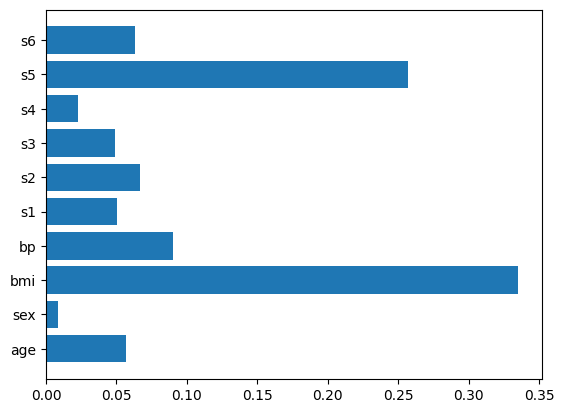

Bad pipe message: %s [b'\xca\xba\x88\x95\xbbK\xa3\x02l\x9f\x89\xc8r']
Bad pipe message: %s [b"{5\t|\xd1l\x90\x92=;u\xa9\xbe\x11\x9c7\x06\x1a\x00\x00\xf4\xc00\xc0,\xc0(\xc0$\xc0\x14\xc0\n\x00\xa5\x00\xa3\x00\xa1\x00\x9f\x00k\x00j\x00i\x00h\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00\xa7\x00m\x00:\x00\x89\xc02\xc0.\xc0*\xc0&\xc0\x0f\xc0\x05\x00\x9d\x00=\x005\x00\x84\xc0/\xc0+\xc0'\xc0#\xc0\x13\xc0\t\x00\xa4\x00\xa2\x00\xa0\x00\x9e\x00g\x00@\x00?\x00>\x003\x002\x001\x000\x00\x9a\x00\x99\x00\x98\x00\x97\x00E\x00D\x00C\x00B\xc0\x18\x00\xa6\x00l\x004\x00\x9b\x00F"]
Bad pipe message: %s [b'\xa9\xbd8\x88\xf0\xb6\xdc\xdf\x8cX\xadcr\xfaJ\x91\xed\x0c 9/\x1f\x99\xf3]\x08\xa6Q\xca-\x81H\x9b\x05\xd9\x0fK\xa2\xd5\xde\xec\x17\xf5\x8d\x97!\x00\x93L8\x18\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x

In [49]:
fi=rf.feature_importances_
columns=df.columns

# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.barh(columns, fi)
plt.show()

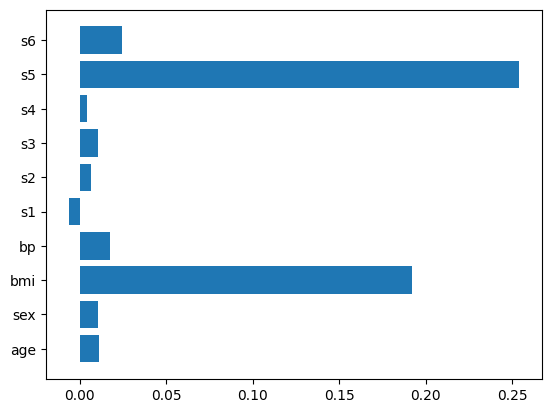

In [53]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, x_valid, y_valid)
perm_imp_mean=perm_importance.importances_mean

plt.barh(columns, perm_imp_mean)
plt.show()